# Exploratory Analysis of a Multivariate Time Series

In this notebook, we will look at a multivariate time series and explore a few ways to build an intutive understanding of them. 

A Multi-variate time series includes several time series. One can think of a vector of values evolving over time. 
As a result, there might be dependencies across the different dimensions. 
Consequently, when it comes to multi-variate time series datasets, additional ways to analyze these datasets include 

- Correlation across dimensions
- Distance between the time series: Here we look at a commonly used metric to measure the distance between time series.
- Paired lag plots:


We will look at the following dataset: 

**Exchange rate dataset** contains the daily exchange rates from 1990 to 2016 of 8 countries including Australia, British, Canda, Switzerland, China, Japan, New Zealand, and Signapore. ***It contains a total of 8 univariate time series for a total of 7588 time steps.***


**Note:** The discussion in notebook is merely to enrich your repertoire of tools to analyze multivariate time series. We will only be skimming at these methods without taking them to construct some serious hypothesis about the time series.



## Setup

In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import json

import utils_tfb # contains the function to read/preprocess the datasets as provided by the authors

TS_DATA_FOLDER = pathlib.Path("./forecasting").resolve() # Data folder

random.seed(14)

In [2]:
exchange_rate_dataset = TS_DATA_FOLDER / "Exchange.csv"
exchange_rate_data = utils_tfb.read_data(str(exchange_rate_dataset))
print("Dataset shape:", exchange_rate_data.shape)
exchange_rate_data.head()

Dataset shape: (7588, 8)


,0,1,2,3,4,5,6,OT
date,,,,,,,,
1990-01-01,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.525486,0.5930
1990-01-02,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.523972,0.5940
1990-01-03,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.526316,0.5973
1990-01-04,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.523834,0.5970
1990-01-05,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.527426,0.5985


## Raw data


<Axes: xlabel='date'>

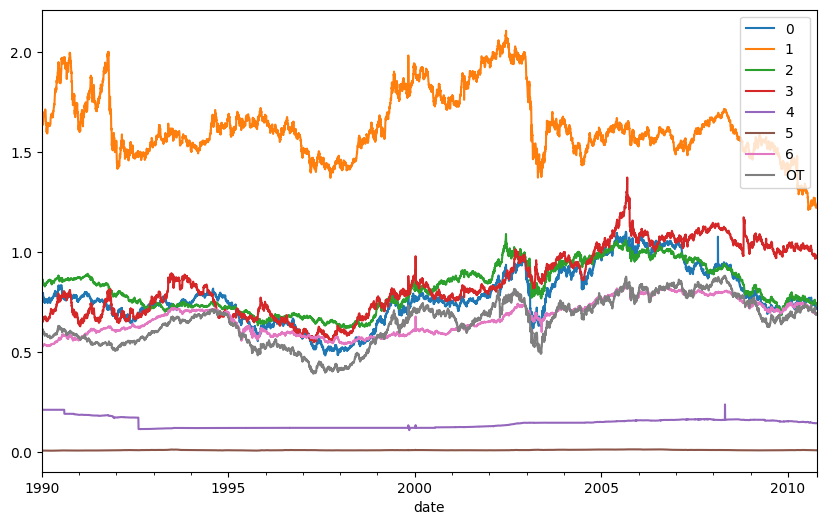

In [26]:
exchange_rate_data.plot( figsize=(10, 6))

## Descriptive statistics

In [34]:
exchange_rate_data.describe()

,0,1,2,3,4,5,6,OT
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,0.776974,1.634105,0.821811,0.848146,0.142833,0.009343,0.669673,0.654418
std,0.136620,0.161544,0.117123,0.168874,0.023996,0.001458,0.082836,0.115292
min,0.483297,1.211534,0.618582,0.548617,0.109292,0.006254,0.523834,0.393153
25%,0.701422,1.532887,0.727901,0.696864,0.120814,0.008331,0.593287,0.566000
50%,0.761377,1.606574,0.811582,0.813959,0.145212,0.009151,0.662767,0.669187
75%,0.873477,1.707646,0.920394,1.014018,0.159948,0.009995,0.731835,0.734901
max,1.102536,2.109000,1.091524,1.374079,0.237954,0.013202,0.832556,0.882379


## Correlation across dimensions

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

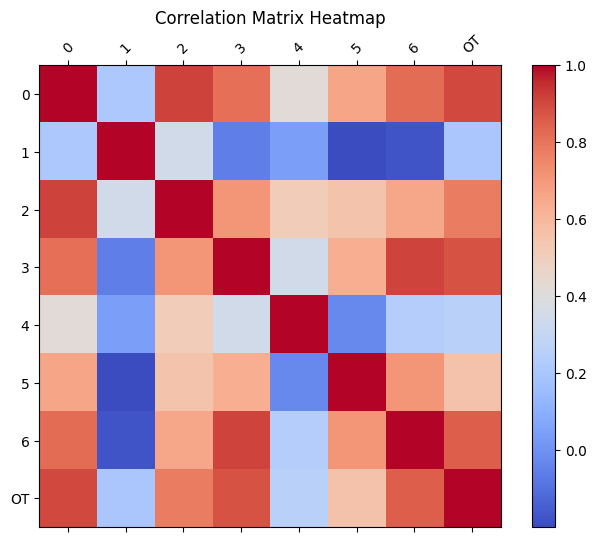

In [3]:
# Correlation matrix plot
correlation_matrix = exchange_rate_data.corr()

fig, ax = plt.subplots(figsize=(8, 6))  # Size of the figure
cax = ax.matshow(correlation_matrix, cmap='coolwarm')  # Create a matrix plot with a color map


ax.set_xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
ax.set_yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

fig.colorbar(cax)

ax.set_title("Correlation Matrix Heatmap")


## Stationarity of each series

In [4]:
# Check stationarity
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
for column in exchange_rate_data.columns:
    result = adfuller(exchange_rate_data[column])
    
    # print(f'p-value for {column}: {result[1]}')   
    pvalue = result[1]
    if pvalue < alpha:
        print(f"Dimension: {column} -- Reject the null: the time series is stationary")
    else:
        print(f"Dimension: {column} -- Accept the null: the time series is non-stationary")


Dimension: 0 -- Accept the null: the time series is non-stationary
Dimension: 1 -- Accept the null: the time series is non-stationary
Dimension: 2 -- Accept the null: the time series is non-stationary
Dimension: 3 -- Accept the null: the time series is non-stationary
Dimension: 4 -- Reject the null: the time series is stationary
Dimension: 5 -- Accept the null: the time series is non-stationary
Dimension: 6 -- Accept the null: the time series is non-stationary
Dimension: OT -- Accept the null: the time series is non-stationary


## Autocorrelation

Text(0.5, 0, 'Hours')

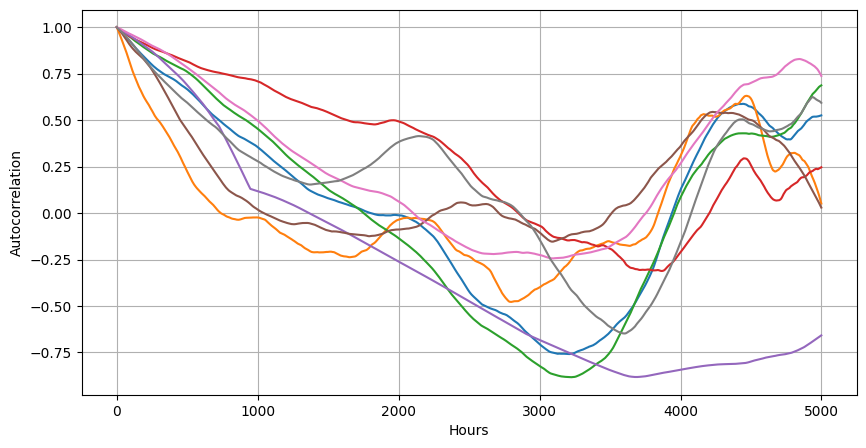

In [5]:
lags = np.arange(5000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=100)

for column in exchange_rate_data.columns:
    autocorrs = [exchange_rate_data[column].autocorr(lag=lag) for lag in lags]
    ax.plot(autocorrs)

ax.grid()
ax.set_ylabel("Autocorrelation")
ax.set_xlabel("Hours")

## Partial Autocorrelation

Text(0.5, 0, 'Hours')

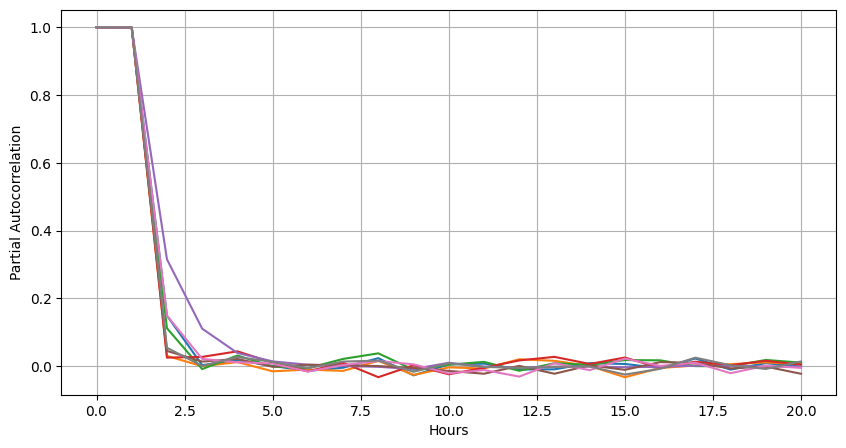

In [6]:
from statsmodels.tsa.stattools import pacf

nlags = 20
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=100)

for column in exchange_rate_data.columns:
    x = pacf(exchange_rate_data[column], nlags=nlags)
    ax.plot(x)

ax.grid()
ax.set_ylabel("Partial Autocorrelation")
ax.set_xlabel("Hours")

### Distance between time series

One common metric to compute the distance between time series is DTW - [Dyanmic Time Warping](https://en.wikipedia.org/wiki/Dynamic_time_warping).

In Python, there is a library that helps compute this ina faster and efficient manner. Let's look at the distances between time series in the exchange rate dataset

```bash
pip install fastdtw
```

In [8]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [9]:
n_series = len(exchange_rate_data.columns)
distance_matrix = np.zeros((n_series, n_series))

for i in range(n_series):
    for j in range(i+1, n_series):
        coli = exchange_rate_data.columns[i]
        colj = exchange_rate_data.columns[j]
        distance, _ = fastdtw(exchange_rate_data[coli].values[..., None], exchange_rate_data[colj].values[..., None], dist=euclidean)
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

print("DTW Distance Matrix:")
print(distance_matrix)

DTW Distance Matrix:
[[    0.        6503.910762   215.595999   380.896323  4811.860942
   5824.783516   528.881123   532.841469]
 [ 6503.910762     0.        6163.686191  5923.894029 11315.771704
  12328.694278  7318.10584   7433.866551]
 [  215.595999  6163.686191     0.         445.539696  5152.085513
   6165.008087   712.330017   815.73895 ]
 [  380.896323  5923.894029   445.539696     0.        5351.915527
   6364.838101   915.375328   957.042685]
 [ 4811.860942 11315.771704  5152.085513  5351.915527     0.
   1012.922574  3997.665864  3881.905153]
 [ 5824.783516 12328.694278  6165.008087  6364.838101  1012.922574
      0.        5010.588438  4894.827727]
 [  528.881123  7318.10584    712.330017   915.375328  3997.665864
   5010.588438     0.         191.346374]
 [  532.841469  7433.866551   815.73895    957.042685  3881.905153
   4894.827727   191.346374     0.      ]]


Text(0.5, 1.0, 'DTW distances')

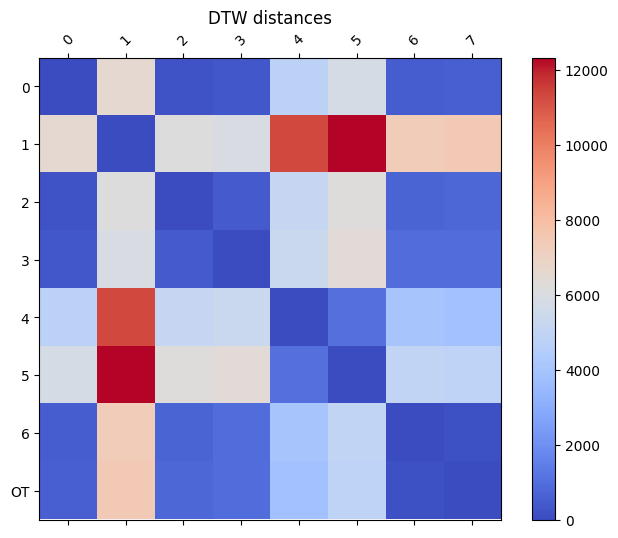

In [10]:
fig, ax = plt.subplots(figsize=(8, 6)) 
cax = ax.matshow(distance_matrix, cmap='coolwarm') 

ax.set_xticks(range(n_series), range(n_series), rotation=45)
ax.set_yticks(range(n_series), correlation_matrix.columns)

fig.colorbar(cax)

ax.set_title("DTW distances")


**Note:** As we expecteed, the time series 4,5 are quite far apart from the rest of the time series.

## Paired Lag plots

We can also look at the lag plots cross-variables. Here we look at only a few of them.


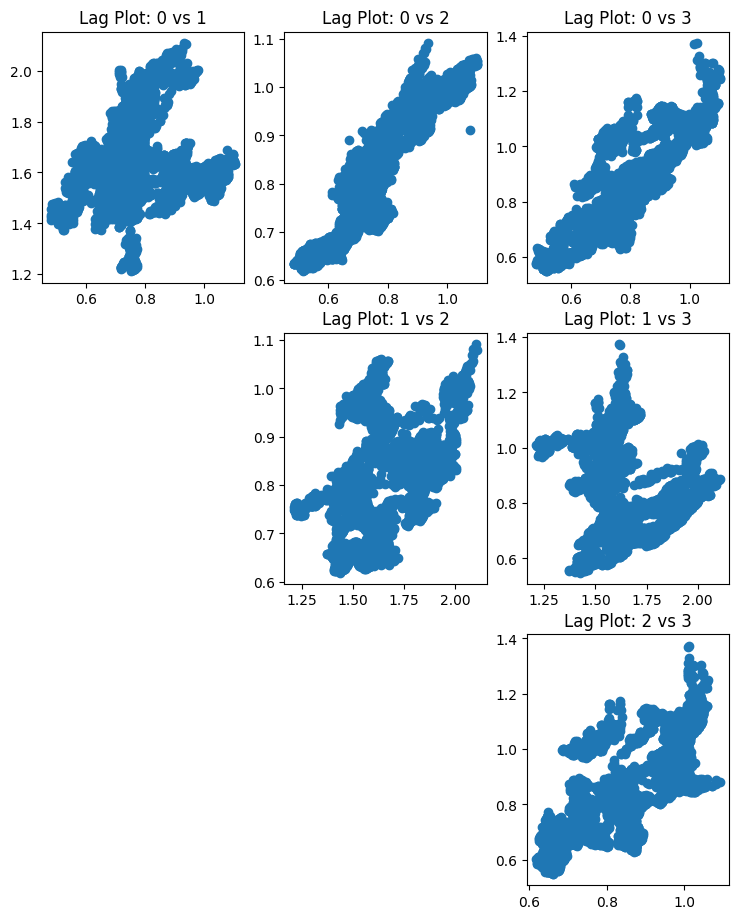

In [11]:
n_series=4
fig, axes = plt.subplots(nrows=n_series, ncols=n_series, figsize=(12, 15))

# Loop through rows
for i in range(n_series):
    for j in range(n_series):
        ax = axes[i, j]
        coli = exchange_rate_data.columns[i]
        colj = exchange_rate_data.columns[j]
        if i < j:  # Only upper triangle
            ax.scatter(exchange_rate_data[coli], exchange_rate_data[colj])
            ax.set_title(f'Lag Plot: {coli} vs {colj}')
        else:
            ax.set_visible(False) 
